### Tratamiento de variables categoricas

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [4]:
#df= pd.read_csv("Hola/python-ml-course-master/datasets/ecom-expense/Ecom Expense.csv")
df= pd.read_csv("Ecom Expense.csv")

In [5]:
dumy_gender= pd.get_dummies(df["Gender"], prefix= "Gender")
dumy_city= pd.get_dummies(df["City Tier"], prefix= "City")

In [6]:
dumy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [7]:
columns_names= df.columns.values.tolist()
columns_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [8]:
df_new= df[columns_names].join(dumy_gender)
columns_names= df_new.columns.values.tolist()

In [9]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [10]:
df_new= df_new[columns_names].join(dumy_city)
columns_names= df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [11]:
future_cols = ["Monthly Income", "Transaction Time", "Gender_Female", "Gender_Male", "City_Tier 1", "City_Tier 2", "City_Tier 3", "Record"]

In [12]:
x = df_new[future_cols]
y = df_new["Total Spend"]

In [13]:
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [14]:
print(lm.intercept_)
print (lm.coef_)

-79.4171303013718
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [15]:
list(zip(future_cols, lm.coef_))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.15494612549589634),
 ('Gender_Female', -131.02501325554624),
 ('Gender_Male', 131.02501325554607),
 ('City_Tier 1', 76.76432601049513),
 ('City_Tier 2', 55.1389743092325),
 ('City_Tier 3', -131.9033003197277),
 ('Record', 772.2334457445645)]

In [16]:
lm.score(x,y)

0.9179923586131016

In [17]:
df_new["Prediction"]= -79.4171303013718 + df_new['Monthly Income']*0.14753898049205738+df_new[
    'Transaction Time']*0.15494612549589634 + df_new['Gender_Female']*(-131.02501325554624)+df_new[
    'Gender_Male']*131.02501325554607+df_new['City_Tier 1']*76.76432601049513+df_new['City_Tier 2']*55.1389743092325+df_new[
    'City_Tier 3']*(-131.9033003197277) +df_new['Record']*772.2334457445645

                  

In [18]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,Prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [19]:
SSD = np.sum((df_new["Prediction"]-df_new["Total Spend"])**2)
SSD

1517733985.340816

In [20]:
RSE= np.sqrt(SSD/(len(df_new)-len(future_cols)-1))
RSE

803.1318809818165

In [21]:
sales_mean= np.mean(df_new["Total Spend"])

In [22]:
error= RSE/sales_mean
error

0.13031135680294162

In [23]:
df_new["prediction"] = lm.predict(pd.DataFrame(df_new[future_cols]))
df_new

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,Prediction,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335,3581.980335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546,0,1,0,1,0,3336.456655,3336.456655
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136,0,1,0,1,0,8069.348522,8069.348522
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448,1,0,0,0,1,9050.690358,9050.690358
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856,1,0,1,0,0,8220.596094,8220.596094


### Eliminar variables dummy redudantes

In [24]:
dumy_gender= pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:]

In [25]:
dumy_gender

,Gender_Male
0,0
1,0
2,1
3,0
4,0
...,...
2357,1
2358,1
2359,0
2360,0


In [26]:
dumy_city= pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:]
dumy_city

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0
...,...,...
2357,1,0
2358,1,0
2359,0,1
2360,0,0


In [27]:
column_names= df.columns.values.tolist()
df_new= df[column_names].join(dumy_gender)
column_names=df_new.columns.values.tolist()
df_new= df_new[column_names].join(dumy_city)

In [28]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


### Transformacion de variables para conseguir una relacion no lineal

In [28]:
data_auto= pd.read_csv("Hola/python-ml-course-master/datasets/auto/auto-mpg.csv")

In [29]:
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [30]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CV Vs MPG')

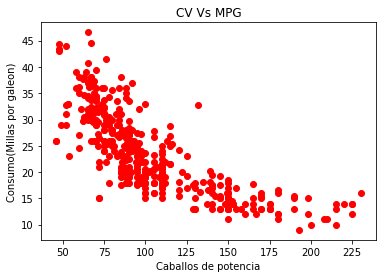

In [31]:
%matplotlib inline
data_auto["mpg"]= data_auto["mpg"].dropna()
data_auto["horsepower"]= data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Caballos de potencia")
plt.ylabel("Consumo(Millas por galeon)")
plt.title("CV Vs MPG")

In [32]:
x= data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
y= data_auto["mpg"].fillna(data_auto["mpg"].mean())
x_data=x[:, np.newaxis]

<ipython-input-32-b1caac2b91b9>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_data=x[:, np.newaxis]


In [33]:
lm= LinearRegression()
lm.fit(x[:, np.newaxis],y)

<ipython-input-33-a418f9e2da90>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lm.fit(x[:, np.newaxis],y)


LinearRegression()

<ipython-input-34-6a687b43afaf>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(x, lm.predict(x[:, np.newaxis]), color="blue")


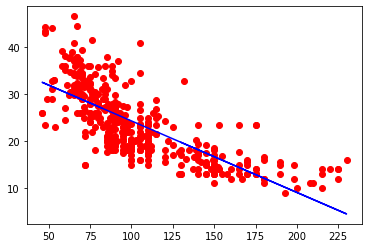

In [34]:
%matplotlib inline
plt.plot(x,y,"ro")
plt.plot(x, lm.predict(x[:, np.newaxis]), color="blue")

In [35]:
lm.score(x_data, y)

0.574653340645025

In [36]:
SSD= np.sum((y-lm.predict(x_data))**2)
SSD
y_mean= np.mean(y)
RSE= np.sqrt(SSD/(len(x_data)-1))
error= RSE/y_mean

SSD, RSE,y_mean, error


(10315.75196006092, 5.046879480825511, 23.51457286432162, 0.21462773361633458)

### Modelo de regresion cuadratica

* mpg= a + b* horsepower^2

In [37]:
x_data = x**2
x_data= x_data[:, np.newaxis]

<ipython-input-37-19c14a62733a>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_data= x_data[:, np.newaxis]


In [38]:
lm=LinearRegression()
lm.fit(x_data, y)

LinearRegression()

In [39]:
lm.score(x_data, y)

0.4849887034823205

In [40]:
SSD= np.sum((y-lm.predict(x_data))**2)
SSD
y_mean= np.mean(y)
RSE= np.sqrt(SSD/(len(x_data)-1))
error= RSE/y_mean

SSD, RSE,y_mean, error

(12490.350340501926, 5.553410772769817, 23.51457286432162, 0.236168898529981)

### Modelo de regresion lineal y cuadratica

* mpg= a + b*horsepower+ c*horsepower^2

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [42]:
poly = PolynomialFeatures(degree= 2)

In [43]:
x_data= poly.fit_transform(x[:, np.newaxis])

<ipython-input-43-9d9296ec2d5d>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_data= poly.fit_transform(x[:, np.newaxis])


In [44]:
lm= linear_model.LinearRegression()
lm.fit(x_data,y)

LinearRegression()

In [45]:
lm.score(x_data, y)

0.6439066584257469

In [46]:
lm.intercept_

55.02619244708036

In [47]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

In [48]:
for d in range (2,5):
    poly = PolynomialFeatures(degree= d)
    x_data= poly.fit_transform(x[:, np.newaxis])
    lm= linear_model.LinearRegression()
    lm.fit(x_data,y)
    print("Regresion de grado " + str(d))
    print(lm.score(x_data,y))
    print(lm.intercept_)
    print(lm.coef_)
     

Regresion de grado 2
0.6439066584257469
55.02619244708036
[ 0.         -0.43404318  0.00112615]
Regresion de grado 3
0.6444678885560744
58.44877411191831
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
Regresion de grado 4
0.6467674189704502
40.096643848138505
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]


<ipython-input-48-7eab573e6a36>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_data= poly.fit_transform(x[:, np.newaxis])
<ipython-input-48-7eab573e6a36>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_data= poly.fit_transform(x[:, np.newaxis])
<ipython-input-48-7eab573e6a36>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_data= poly.fit_transform(x[:, np.newaxis])


#### El problema de los outiers

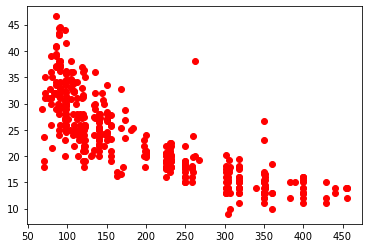

In [49]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro")

In [50]:
x= data_auto["displacement"].fillna(data_auto["displacement"].mean())
x= x[:,np.newaxis]
y= data_auto["mpg"].fillna(data_auto["mpg"].mean())

<ipython-input-50-c6ad42a4c3e5>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x= x[:,np.newaxis]


In [51]:
lm= LinearRegression()
lm.fit(x, y)

LinearRegression()

In [52]:
lm.score(x, y)

0.6261049762826918

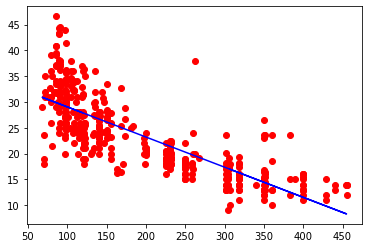

In [55]:
%matplotlib inline
plt.plot(x,y,"ro")
plt.plot(x, lm.predict(x), color="blue")

In [56]:
data_auto[(data_auto["displacement"]>250)&(data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [57]:
data_auto[(data_auto["displacement"]>300)&(data_auto["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [60]:
data_auto_cleam= data_auto.drop([395,258,305,372])

In [61]:
x= data_auto_cleam["displacement"].fillna(data_auto_cleam["displacement"].mean())
x= x[:,np.newaxis]
y= data_auto_cleam["mpg"].fillna(data_auto_cleam["mpg"].mean())

<ipython-input-61-875dfe32f7b3>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x= x[:,np.newaxis]


In [62]:
lm= LinearRegression()
lm.fit(x, y)
lm.score(x,y)

0.6466514317531822

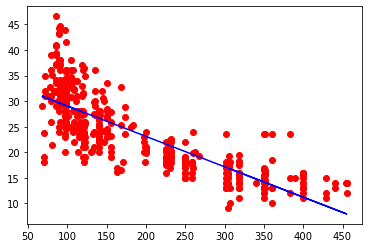

In [63]:
%matplotlib inline
plt.plot(x,y,"ro")
plt.plot(x, lm.predict(x), color="blue")

In [ ]:
x